# Part 1:
Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nv = pd.read_csv('employee_retention_data.csv')

### Check out the dataset:

In [40]:
nv.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  
0  2015-10-30  
1  2014-04-04  
2         NaN  
3  2013-06-07  
4  2014-08-22

In [41]:
nv['quit'] = nv['quit_date'].notnull()*1
nv.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  quit  
0  2015-10-30     1  
1  2014-04-04     1  
2         NaN     0  
3  2013-06-07     1  
4  2014-08-22     1

In [42]:
# Compute the different time between the first sign up and the first purchase. We suspect that this is a good feature
nv['join_date'] = pd.to_datetime(nv.join_date)
nv['quit_date'] = pd.to_datetime(nv.quit_date)
 
nv.dtypes

employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
quit                    int32
dtype: object

In [43]:
nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
quit           24702 non-null int32
dtypes: datetime64[ns](2), float64(2), int32(1), int64(2), object(1)
memory usage: 1.4+ MB


### Get the number of people who quit and join each day:

In [44]:
x = nv.groupby(nv.company_id).join_date.value_counts().sort_index()
y = nv.groupby(nv.company_id).quit_date.value_counts().sort_index()

n = pd.concat([x, y], axis = 1)

# Change Nan values to 0 in both columns:
n['join_date'].fillna(value = 0, inplace = True)
n['quit_date'].fillna(value = 0, inplace = True)
n.iloc[:10, :]

join_date  quit_date
1 2011-01-24       25.0        0.0
  2011-01-25        2.0        0.0
  2011-01-26        2.0        0.0
  2011-01-31       30.0        0.0
  2011-02-01        7.0        0.0
  2011-02-02        1.0        0.0
  2011-02-07       32.0        0.0
  2011-02-08        3.0        0.0
  2011-02-09        2.0        0.0
  2011-02-14       25.0        0.0

### Create a series of day from 2011/01/24 to 2015/12/13. 

In [45]:
str = pd.to_datetime('2011-01-24')
datelist = pd.date_range(str, periods = 1785).tolist()
o = datelist * 12
len(o)
o = pd.DataFrame(o)
o.tail()

0
21415 2015-12-09
21416 2015-12-10
21417 2015-12-11
21418 2015-12-12
21419 2015-12-13

### Create a list of index for 12 companies:

In [46]:
l = []
for i in np.arange(1,13):
    x = [i] * len(datelist)
    l.append(x)
l = list(np.array(l).flat)
l = pd.DataFrame(l)
l.tail()

0
21415  12
21416  12
21417  12
21418  12
21419  12

### Create a new dataframe with company index and time

In [47]:
new_nv = pd.concat([l, o], axis = 1)
new_nv.columns = ['id', 'date']

print('Dimension of this dataframe:', new_nv.shape)
new_nv.head()

Dimension of this dataframe: (21420, 2)


id       date
0   1 2011-01-24
1   1 2011-01-25
2   1 2011-01-26
3   1 2011-01-27
4   1 2011-01-28

In [48]:
# Create a new column
new_nv = new_nv.assign(balanced = np.nan)
new_nv = new_nv.set_index(['id', 'date'])
new_nv.head()


balanced
id date                
1  2011-01-24       NaN
   2011-01-25       NaN
   2011-01-26       NaN
   2011-01-27       NaN
   2011-01-28       NaN

In [49]:
new_employee = pd.concat([new_nv, n], axis = 1)
new_employee.head()

balanced  join_date  quit_date
1 2011-01-24       NaN       25.0        0.0
  2011-01-25       NaN        2.0        0.0
  2011-01-26       NaN        2.0        0.0
  2011-01-27       NaN        NaN        NaN
  2011-01-28       NaN        NaN        NaN

In [50]:
new_employee['quit_date'].fillna(value = 0, inplace = True)
new_employee['join_date'].fillna(value = 0, inplace = True)
new_employee.head()


balanced  join_date  quit_date
1 2011-01-24       NaN       25.0        0.0
  2011-01-25       NaN        2.0        0.0
  2011-01-26       NaN        2.0        0.0
  2011-01-27       NaN        0.0        0.0
  2011-01-28       NaN        0.0        0.0

In [51]:
new_employee = new_employee.drop(['balanced'], axis=1)
new_employee = new_employee.assign(head_count = lambda x: x['join_date'] - x['quit_date'])
new_employee.head()

join_date  quit_date  head_count
1 2011-01-24       25.0        0.0        25.0
  2011-01-25        2.0        0.0         2.0
  2011-01-26        2.0        0.0         2.0
  2011-01-27        0.0        0.0         0.0
  2011-01-28        0.0        0.0         0.0

In [52]:
# new_employee.loc(new_employee['id'] == 1, head_count).cumsum()
new_employee.index.names = ['id', 'date']
new_employee.head()

join_date  quit_date  head_count
id date                                        
1  2011-01-24       25.0        0.0        25.0
   2011-01-25        2.0        0.0         2.0
   2011-01-26        2.0        0.0         2.0
   2011-01-27        0.0        0.0         0.0
   2011-01-28        0.0        0.0         0.0

In [53]:
ds = pd.DataFrame(new_employee.groupby(by=['id','date']).head_count.sum().groupby(level = [0]).cumsum())
ds.head()

head_count
id date                  
1  2011-01-24        25.0
   2011-01-25        27.0
   2011-01-26        29.0
   2011-01-27        29.0
   2011-01-28        29.0

# Part 2: 
●	What are the main factors that drive employee churn? Do they make sense? Explain your findings

### Create a new feature "quit" to show wether an employee stays at her/his company

In [54]:
nv.head()

employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  quit  
0 2015-10-30     1  
1 2014-04-04     1  
2        NaT     0  
3 2013-06-07     1  
4 2014-08-22     1

In [55]:
end_date = pd.to_datetime('2015-12-13')
nv['quit_date'].fillna(value = end_date, inplace = True)
nv.head()

employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  quit  
0 2015-10-30     1  
1 2014-04-04     1  
2 2015-12-13     0  
3 2013-06-07     1  
4 2014-08-22     1

### Clean data:

In [56]:
#Check the value of Seniority:
nv.seniority.unique()

array([28, 20, 14, 23, 21,  4,  7, 13, 17,  1, 10,  6, 19, 15, 26, 27,  5,
       18, 16, 25,  9,  2, 29,  3,  8, 22, 24, 12, 11, 98, 99],
      dtype=int64)

In [57]:
# Check to see what is going on with people having 98,99 years of experience:
nv.loc[(nv['seniority'] == 98) | (nv['seniority'] == 99)]

# There is only 2 persons like this, so we can get rid of this data. It must be a noise in our data.

employee_id  company_id       dept  seniority    salary  join_date  \
24700      97289.0          10   engineer         98  266000.0 2011-12-13   
24701     604052.0           1  marketing         99  185000.0 2011-07-26   

       quit_date  quit  
24700 2015-01-09     1  
24701 2013-12-06     1

In [58]:
nv = nv.loc[(nv['seniority'] != 98) & (nv['seniority'] != 99)]
# Recheck
nv.loc[(nv['seniority'] == 98) | (nv['seniority'] == 99), 'seniority'].value_counts()

Series([], Name: seniority, dtype: int64)

In [59]:
nv = nv.drop(['employee_id', 'company_id', 'join_date', 'quit_date'], axis = 1)

## 1. Find the main factors - Visualization

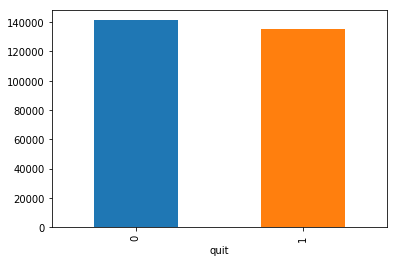

In [60]:
%matplotlib inline
nv.groupby('quit').salary.mean().plot(kind = 'bar')


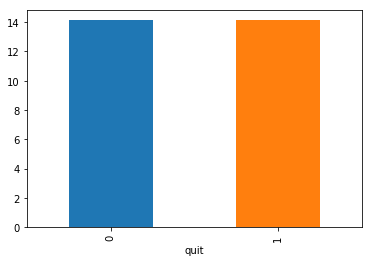

In [61]:
nv.groupby('quit').seniority.mean().plot(kind = 'bar')

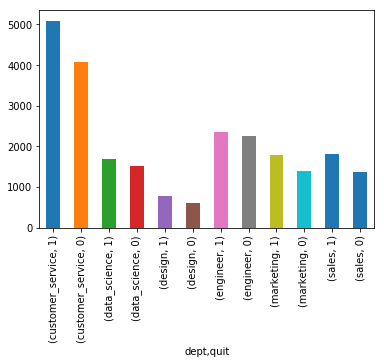

In [62]:
nv.groupby('dept').quit.value_counts().plot(kind = 'bar')

## 2. Find the main factor - Low variance filter

In [63]:
# Prepare the dataset and class set:
nv_features = nv.drop(['quit'], axis = 1)
nv_class = nv['quit']

In [64]:
var = nv_features.var()
print("variance of each feature:")
print(var)

variance of each feature:
seniority    6.486913e+01
salary       5.784566e+09
dtype: float64


*Maybe the salary at a company has the least effect on the employee churn since they do not vary as much as their experience.*

## 3. Find the main factor - Random Forest

In [65]:
# Create 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1, max_depth=10)

# Convert categorical variable into dummy/indicator variables
nv_features = pd.get_dummies(nv_features)

# Fit model
forest.fit(nv_features,nv_class)

C:\Users\nhung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [66]:
features = nv_features.columns

In [67]:
importances = forest.feature_importances_
importances

array([0.29183678, 0.5941366 , 0.00949537, 0.02687855, 0.0172735 ,
       0.02597976, 0.01685509, 0.01754435])

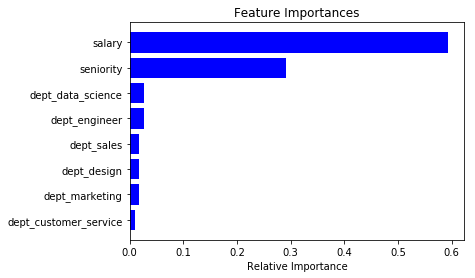

In [68]:
nSelectedFeature = 12

# numpy.argsort: 
# >>> x = np.array([3, 1, 2])
# >>> np.argsort(x)
# array([1, 2, 0])
indices = np.argsort(importances)[-(nSelectedFeature-1):]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## 4. Find the main factor - Linear Regression RFE (Recursive Feature Elimination)

[1.84759222e-03 3.32181695e+01 3.79188402e+00 5.68533851e+00
 1.68176837e+00 2.79946010e+01 3.73910881e+00 8.49741293e+00]


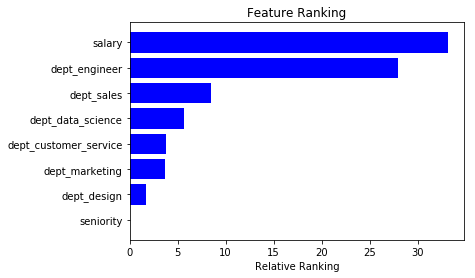

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(nv_features, nv_class)
from sklearn.feature_selection import f_regression
ffs = f_regression(nv_features,nv_class)
rankinfo = ffs[0]
print(rankinfo)

features = nv_features.columns
nSelectedFeature = 12
indices = np.argsort(rankinfo)[-(nSelectedFeature-1):]
plt.title('Feature Ranking')
plt.barh(range(len(indices)), rankinfo[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Ranking')
plt.show()

*It seems that "Salary" is the most important feature that drive employee churn. It makes sense.*

# Part 3. 
- Q: If you could add to this data set just one variable that could help explain employee churn, what would that be?
- A: It would be Overworking time each day/each week. This feature shows that wether the need of balancing between professional life and personal life of an employee is satisfied or not. I belive that it reflex the commitment of an employee to his/her company.

# Part 4: Remarks

- The dataset does not have many features. It would be better if we can get other information on employees.
- Is it possible that the commitment of an employee is related to the time since he/she started working int the company? The reason is that there might be a specific period that a major change of supervisors/team members happend. And with this change it could affect the new employee. We can test this theory by analysing a bit more on the year/month information. However since the time is limited, the task might be done in different report.
